In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [96]:
data=pd.read_csv('Day4_medico.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [98]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: ylabel='count'>

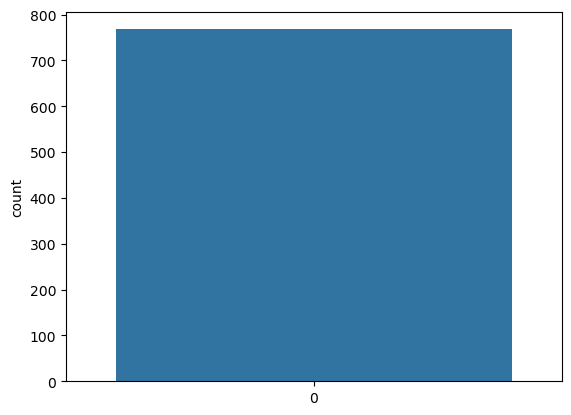

In [99]:
sns.countplot(data['Outcome'])

In [100]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [101]:
prior_condition = (data['Outcome'] == 1).mean()
prior_no_condition = 1 - prior_condition

In [118]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
k=5
y = y.values.ravel()
x_new = SelectKBest(chi2, k=k).fit_transform(x, y)
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y,test_size=0.2,random_state=6)
print('\n*****Training Data Shape" *******\n')
print("\nTraining data-X- Shape:\t",xtrain.shape)
print("\nTraining data-y- Shape:\t",ytrain. shape)
print('\n***************Testing Data Shape***************\n')
print('\nTesting data (x-Input) Shape:\t',xtest.shape)
print('\nTesting data (y-Outcome) Shape:\t',ytest.shape)


*****Training Data Shape" *******


Training data-X- Shape:	 (614, 5)

Training data-y- Shape:	 (614,)

***************Testing Data Shape***************


Testing data (x-Input) Shape:	 (154, 5)

Testing data (y-Outcome) Shape:	 (154,)


In [119]:
from sklearn.naive_bayes import GaussianNB
gaus_nb=GaussianNB()
gaus_nb.fit(xtrain,ytrain)
ypred=gaus_nb.predict(xtest)
print('\n*****Performance measure for GAUSSIAN NB classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ytest,ypred))

print("\n****************************** "*2)

print('\nClassification Report : \t',classification_report(ytest,ypred))
print("\n****************************** "*2)

print('\nF1 Score : \t',f1_score(ytest,ypred))

print("\n****************************** "*2)

print('\nRecall Score : \t',recall_score(ytest,ypred))





*****Performance measure for GAUSSIAN NB classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.7987012987012987

****************************** 
****************************** 

Confusion Matrix:	 [[90 13]
 [18 33]]

****************************** 
****************************** 

Classification Report : 	               precision    recall  f1-score   support

           0       0.83      0.87      0.85       103
           1       0.72      0.65      0.68        51

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.80      0.80       154


****************************** 
****************************** 

F1 Score : 	 0.6804123711340206

****************************** 
****************************** 

Recall Score : 	 0.6470588235294118


In [120]:
from sklearn.naive_bayes import MultinomialNB
mul_nb=MultinomialNB()
mul_nb.fit(xtrain,ytrain)
ypred=mul_nb.predict(xtest)
print('\n*****Performance measure for MULTINOMIALNB classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ytest,ypred))

print("\n****************************** "*2)

print('\nClassification Report : \t',classification_report(ytest,ypred))
print("\n****************************** "*2)

print('\nF1 Score : \t',f1_score(ytest,ypred))

print("\n****************************** "*2)

print('\nRecall Score : \t',recall_score(ytest,ypred))





*****Performance measure for MULTINOMIALNB classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.5714285714285714

****************************** 
****************************** 

Confusion Matrix:	 [[64 39]
 [27 24]]

****************************** 
****************************** 

Classification Report : 	               precision    recall  f1-score   support

           0       0.70      0.62      0.66       103
           1       0.38      0.47      0.42        51

    accuracy                           0.57       154
   macro avg       0.54      0.55      0.54       154
weighted avg       0.60      0.57      0.58       154


****************************** 
****************************** 

F1 Score : 	 0.42105263157894735

****************************** 
****************************** 

Recall Score : 	 0.47058823529411764


In [121]:
from sklearn.naive_bayes import BernoulliNB
ber_nb=BernoulliNB()
ber_nb.fit(xtrain,ytrain)
ypred=ber_nb.predict(xtest)
print('\n*****Performance measure for  Bernoulli NB classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ytest,ypred))

print("\n****************************** "*2)

print('\nClassification Report : \t',classification_report(ytest,ypred))
print("\n****************************** "*2)

print('\nF1 Score : \t',f1_score(ytest,ypred))

print("\n****************************** "*2)

print('\nRecall Score : \t',recall_score(ytest,ypred))



*****Performance measure for  Bernoulli NB classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.6688311688311688

****************************** 
****************************** 

Confusion Matrix:	 [[103   0]
 [ 51   0]]

****************************** 
****************************** 

Classification Report : 	               precision    recall  f1-score   support

           0       0.67      1.00      0.80       103
           1       0.00      0.00      0.00        51

    accuracy                           0.67       154
   macro avg       0.33      0.50      0.40       154
weighted avg       0.45      0.67      0.54       154


****************************** 
****************************** 

F1 Score : 	 0.0

****************************** 
****************************** 

Recall Score : 	 0.0


C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# KNN

In [122]:
from sklearn.preprocessing import LabelEncoder as le
l=le()
d=pd.read_csv('Customers.csv')
d['Gender']=l.fit_transform(d['Gender'])
d['Profession']=l.fit_transform(d['Profession'])
d.head()

,CustomerID,Gender,Age,Annual_Income($),Spending_Score,Profession,Work_Experience,Family_Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6


In [123]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Gender,2000.0,0.4070,0.491398,0.0,0.00,0.0,1.00,1.0
Age,2000.0,48.9600,28.429747,0.0,25.00,48.0,73.00,99.0
Annual_Income($),2000.0,110731.8215,45739.536688,0.0,74572.00,110045.0,149092.75,189974.0
Spending_Score,2000.0,50.9625,27.934661,0.0,28.00,50.0,75.00,100.0
Profession,2000.0,2.9385,2.649194,0.0,0.00,3.0,5.00,9.0
Work_Experience,2000.0,4.1025,3.922204,0.0,1.00,3.0,7.00,17.0
Family_Size,2000.0,3.7685,1.970749,1.0,2.00,4.0,5.00,9.0


In [124]:
d.isna().sum()

CustomerID          0
Gender              0
Age                 0
Annual_Income($)    0
Spending_Score      0
Profession          0
Work_Experience     0
Family_Size         0
dtype: int64

In [141]:
d = d.fillna(d.mean())

In [142]:
x=d.drop('Spending_Score',axis=1)
y=d.iloc[:,4:5]
y = y.values.ravel()


In [143]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=6)
print('\n*****Training Data Shape" *******\n')
print("\nTraining data-X- Shape:\t",xtrain.shape)
print("\nTraining data-y- Shape:\t",ytrain. shape)
print('\n***************Testing Data Shape***************\n')
print('\nTesting data (x-Input) Shape:\t',xtest.shape)
print('\nTesting data (y-Outcome) Shape:\t',ytest.shape)


*****Training Data Shape" *******


Training data-X- Shape:	 (1600, 7)

Training data-y- Shape:	 (1600,)

***************Testing Data Shape***************


Testing data (x-Input) Shape:	 (400, 7)

Testing data (y-Outcome) Shape:	 (400,)


In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(xtrain,ytrain)
ypred=kn.predict(xtest)
print('\n*****Performance measure for KNN classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ytest,ypred))

print("\n****************************** "*2)

print('\nClassification Report : \t',classification_report(ytest,ypred,zero_division=1))
print("\n****************************** "*2)
# classification_report(ytest, ypred, zero_division=1)



*****Performance measure for KNN classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.02

****************************** 
****************************** 

Confusion Matrix:	 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

****************************** 
****************************** 

Classification Report : 	               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         6
           4       0.10      0.25      0.14         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         3
           9       0.17      0.50      0.25         2
          10  

In [145]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)

In [163]:
ktrain,ktest,ntrain,ntest=train_test_split(sc_x,y,test_size=0.2,random_state=3)
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(ktrain,ntrain)
npred=knn_model.predict(ktest)
print('\n*****Performance measure for classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ntest,npred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ntest,npred))

print("\n****************************** "*2)

print('\nClassification Report : \t',classification_report(ntest,npred,zero_division=1))



*****Performance measure for classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.0075

****************************** 
****************************** 

Confusion Matrix:	 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

****************************** 
****************************** 

Classification Report : 	               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10    

In [159]:

print('\n*****Performance measure for classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ntest,npred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ntest,npred))

print("\n****************************** "*2)

print('\nClassification Report : \t',classification_report(ntest,npred,zero_division=1))



*****Performance measure for classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.0075

****************************** 
****************************** 

Confusion Matrix:	 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

****************************** 
****************************** 

Classification Report : 	               precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.12      0.33      0.18         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2
          10    

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': [5]}  
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(ktrain, ntrain)

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5]})

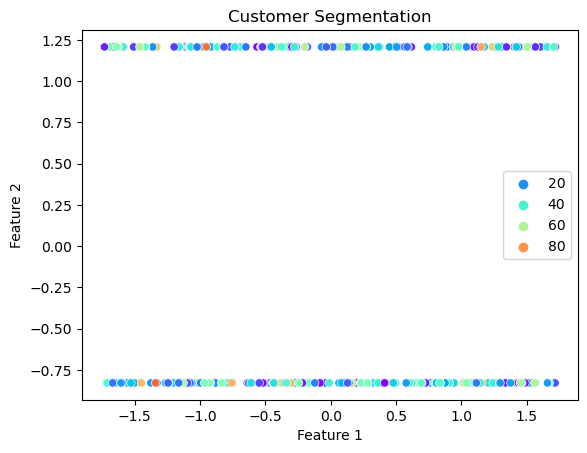

In [162]:
sns.scatterplot(x=ktest[:, 0], y=ktest[:, 1], hue=npred, palette='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Customer Segmentation')
plt.show()
